In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")
df.head(10)

In [ ]:
# get the number of rows and columns
rows = df.shape[0]
columns = df.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 569 rows and 33 columns.


In [ ]:
df.info()

In [ ]:
# print how many missing value in each column
df.isnull().sum()

In [ ]:
df.describe()

We should make sure if there is a null data

In [ ]:
print(df.isnull().sum())

In [ ]:
df.drop(df.columns[-1], axis=1, inplace=True)

In [ ]:
df.isnull().any()

In [ ]:
df.head(10)

In [ ]:
print(df.isnull().sum())

In [ ]:
df.head(10)

# **we will change the daignoses column to a label  and label is an object we should change it **

Normalizing the output from M - malignant   B - benign to 1 and 0 respectivly

M => 1
B => 0

In [ ]:
# define dictionary
diag  = {'B':0, 'M':1}
# replace Label column with 0/1
df['diagnosis'] = df['diagnosis'].apply(lambda x: diag[x])
# # print head to verify
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Plotting the distribution of both outputs ona histogram **

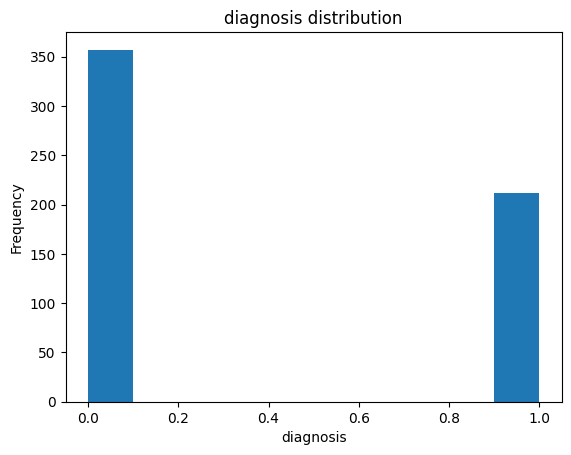

In [ ]:
df["diagnosis"].plot(kind="hist")
plt.title("diagnosis distribution")
plt.xlabel("diagnosis")
plt.ylabel("Frequency")
plt.show()

# **Normalize**

In [ ]:
# get the max of each column
data_max = df.max()
data_max

id                         9.113205e+08
diagnosis                  1.000000e+00
radius_mean                2.811000e+01
texture_mean               3.928000e+01
perimeter_mean             1.885000e+02
area_mean                  2.501000e+03
smoothness_mean            1.634000e-01
compactness_mean           3.454000e-01
concavity_mean             4.268000e-01
concave points_mean        2.012000e-01
symmetry_mean              3.040000e-01
fractal_dimension_mean     9.744000e-02
radius_se                  2.873000e+00
texture_se                 4.885000e+00
perimeter_se               2.198000e+01
area_se                    5.422000e+02
smoothness_se              3.113000e-02
compactness_se             1.354000e-01
concavity_se               3.960000e-01
concave points_se          5.279000e-02
symmetry_se                7.895000e-02
fractal_dimension_se       2.984000e-02
radius_worst               3.604000e+01
texture_worst              4.954000e+01
perimeter_worst            2.512000e+02


In [ ]:
# divide each column by its maximum value
data = df.divide(data_max)
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.033327,0.372583,0.502572,0.491081,0.487899,0.261851,0.589720,0.302087,0.208058,0.243137,...,0.451420,0.518313,0.426995,0.207001,0.594648,0.240326,0.217403,0.393836,0.436992,0.404558
std,0.137186,0.483918,0.125366,0.109497,0.128907,0.140709,0.086072,0.152903,0.186785,0.192857,...,0.134108,0.124067,0.133768,0.133840,0.102572,0.148711,0.166633,0.225884,0.093202,0.087042
min,0.000010,0.000000,0.248346,0.247200,0.232308,0.057377,0.322093,0.056109,0.000000,0.000000,...,0.220033,0.242632,0.200677,0.043535,0.319721,0.025794,0.000000,0.000000,0.235764,0.265253
25%,0.000954,0.000000,0.416222,0.411660,0.398780,0.168053,0.528580,0.187956,0.069260,0.100944,...,0.360988,0.425515,0.334833,0.121133,0.523810,0.139130,0.091454,0.223127,0.377222,0.344386
50%,0.000994,0.000000,0.475631,0.479633,0.457507,0.220352,0.586720,0.268182,0.144189,0.166501,...,0.415372,0.512919,0.388774,0.161378,0.589847,0.200284,0.181070,0.343402,0.425128,0.385735
75%,0.009671,1.000000,0.561366,0.554990,0.552255,0.312955,0.644431,0.377533,0.306232,0.367793,...,0.521365,0.599919,0.499204,0.254819,0.655885,0.320510,0.305831,0.554639,0.478909,0.443759
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Define Keras Model**

In [ ]:
# store the second column as the output (label) in y
X = df.iloc[:, 2:]#[i for i in range(len(df.columns)) if i != 1]]
Y = df.iloc[:, 1:2]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
  # create model
  model = Sequential()
  model.add(Dense(12, input_dim = 30, activation = "relu"))
  model.add(Dense(7, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  return model

In [ ]:
# Create the model object
model = create_model()

# Print the summary of the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                372       
                                                                 
 dense_13 (Dense)            (None, 7)                 91        
                                                                 
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Train Model**

Model 1: using automatic verification dataset

In [ ]:
# create new model
from tensorflow.keras.optimizers import Adam
model = create_model()

# compile model!
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

print("Model trained!")

# **Evaluate Model**

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

18/18 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9420

accuracy: 94.20%


Model 2: using manual verification dataset

In [ ]:
from sklearn.model_selection import train_test_split
model2=create_model()
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=44)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=30)
print("Model is trained")

In [ ]:
# evaluate the model
scores = model2.evaluate(X, Y)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

18/18 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9262

accuracy: 92.62%


In [ ]:
# evaluate the model
scores = model2.evaluate(x_train, y_train) #(X, Y)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.1961 - accuracy: 0.9081

accuracy: 90.81%


In [ ]:
# evaluate the model
scores = model2.evaluate(x_test, y_test) #(X, Y)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9628

accuracy: 96.28%


So the model is neither underfitting nor overfitting

It worked <3

# **Visualizing the correlations between different inputs and the output**

Model 3: Training a model only using the mean value features

In [ ]:
df3=df
df3.drop(df3.columns[13:], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
model3=create_model()
x3_train, x3_test, y3_train, y3_test=train_test_split(X, Y, test_size=0.33, random_state=43)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
model3.fit(x3_train, y3_train, validation_data=(x3_test, y3_test), epochs=100, batch_size=30)
print("Model is trained)")

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 81.0524 - accuracy: 0.3963 - val_loss: 65.0086 - val_accuracy: 0.3245
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 40.9771 - accuracy: 0.3963 - val_loss: 25.4949 - val_accuracy: 0.3245
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 13.2798 - accuracy: 0.3963 - val_loss: 3.7590 - val_accuracy: 0.4043
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 1.3181 - accuracy: 0.6535 - val_loss: 0.9791 - val_accuracy: 0.6170
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7080 - accuracy: 0.6798 - val_loss: 0.6458 - val_accuracy: 0.7340
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5588 - accuracy: 0.7795 - val_loss: 0.5926 - val_accuracy: 0.7979
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.8189 - val_loss: 0.5776 - val_accuracy: 0.8138
Epoch 8

In [ ]:
# evaluate the model
scores = model3.evaluate(x3_train, y3_train) #(X,Y)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.9108

accuracy: 91.08%


In [ ]:
# evaluate the model
scores = model3.evaluate(x3_test, y3_test) #(X, Y)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

6/6 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.9362

accuracy: 93.62%


Model 4: Trainign with standard error/deviation and mean, without worst value(mean of 3 largest values)

In [ ]:
df4=df
df4.drop(df4.columns[23:], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
model4=create_model()
x4_train, x4_test, y4_train, y4_test=train_test_split(X, Y, test_size=0.33, random_state=43)
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
model4.fit(x4_train, y4_train, validation_data=(x4_test, y4_test), epochs=100, batch_size=30)
print("Model is trained)")

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 14.4477 - accuracy: 0.6037 - val_loss: 6.3040 - val_accuracy: 0.6755
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 3.5168 - accuracy: 0.6037 - val_loss: 0.9461 - val_accuracy: 0.6915
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7299 - accuracy: 0.7008 - val_loss: 0.6817 - val_accuracy: 0.4947
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6968 - accuracy: 0.4488 - val_loss: 0.6976 - val_accuracy: 0.3457
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.4121 - val_loss: 0.6970 - val_accuracy: 0.3457
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.4304 - val_loss: 0.6939 - val_accuracy: 0.3830
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.4619 - val_loss: 0.6857 - val_accuracy: 0.4309
Epoch 8/100

In [ ]:
# evaluate the model
scores = model4.evaluate(x4_train, y4_train)  #(X, Y)
print("\n%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

In [ ]:
# evaluate the model
scores = model4.evaluate(x4_test, y4_test) #(X, Y)
print("\n%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))

Model 5: Training with worst value and standard deviation

In [ ]:
df5=df
df5.drop(df5.columns[23:], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
model5=create_model()
x5_train, x5_test, y5_train, y5_test=train_test_split(X, Y, test_size=0.33, random_state=43)
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
model5.fit(x5_train, y5_train, validation_data=(x5_test, y5_test), epochs=100, batch_size=30)
print("Model is trained)")

In [ ]:
# evaluate the model
scores = model5.evaluate(x5_train, y5_train) #(X, Y)
print("\n%s: %.2f%%" % (model5.metrics_names[1], scores[1]*100))

In [ ]:
# evaluate the model
scores = model5.evaluate(x5_test, y5_test) #(X, Y)
print("\n%s: %.2f%%" % (model5.metrics_names[1], scores[1]*100))

# ***Make Predictions***

In [ ]:
import numpy
# make class predictions with the model
#returned values are float
predictions = model5.predict(X)
#set the threshold and convert predictions
threshold=0.5
classes=numpy.where(predictions > threshold, 1,0)
# summarize the first 5 cases
for i in range(10):
    print(classes[i])